### Using to KNClassifier on the Digits datasets from sklearn

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

In [49]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [50]:
df=pd.DataFrame(digits.data)
df['target']=digits.target
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


In [51]:
df.isna().sum().sum()

0

In [52]:
x=df.drop("target",axis="columns")
y=df.target

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [55]:
knn.score(X_test,y_test)

0.9907407407407407

<strong> We saw that KNN model performed well by using deafult n_neighbors=5. Now we will use GridSearchCV to find out the best value of n_neighbors.

In [56]:
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(KNeighborsClassifier(), {
    "n_neighbors":[2,5,10,14,20,25]
},cv=5)
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 5, 10, 14, 20, 25]})

In [57]:
result=pd.DataFrame(clf.cv_results_)
result[["param_n_neighbors","mean_test_score"]]

,param_n_neighbors,mean_test_score
0,2,0.984883
1,5,0.982505
2,10,0.972159
3,14,0.968184
4,20,0.955445
5,25,0.950670


In [58]:
clf.best_params_

{'n_neighbors': 2}

<strong>So as we can see 5 is best Value for n_neighbors

In [59]:
from sklearn.metrics import confusion_matrix
y_predicted=knn.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[48,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 49,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 53,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 69,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 71,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  0,  0, 42]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

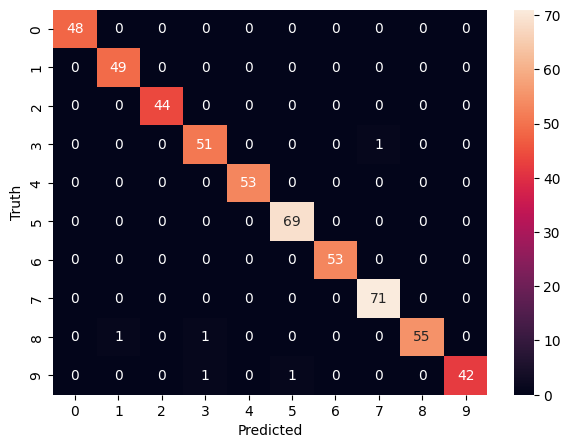

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      1.00      0.99        49
           2       1.00      1.00      1.00        44
           3       0.96      0.98      0.97        52
           4       1.00      1.00      1.00        53
           5       0.99      1.00      0.99        69
           6       1.00      1.00      1.00        53
           7       0.99      1.00      0.99        71
           8       1.00      0.96      0.98        57
           9       1.00      0.95      0.98        44

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

